In [24]:
# Library Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [25]:
# Data Preprocessing
data = pd.read_csv("data.csv")

# Data Cleaning

In [26]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values count for each column
print("Missing values count for each column:")
print(missing_values)

Missing values count for each column:
id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64


In [27]:
# Check the data types of each column
data_types = data.dtypes

# Identify numeric columns
numeric_columns = data_types[data_types != 'object'].index

# Instantiate the SimpleImputer with strategy 'mean' for numeric columns
imputer = SimpleImputer(strategy='mean')

# Apply imputation to fill missing values in numeric columns
data_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Combine imputed numeric data with non-numeric columns
data_non_numeric = data.select_dtypes(include=['object'])
data_imputed = pd.concat([data_non_numeric, data_imputed], axis=1)

# Display missing values count for each column
missing_values_imputed = data_imputed.isnull().sum()

print("Missing values after imputation:")
print(missing_values_imputed)


Missing values after imputation:
id                     0
address1               2
address2             138
address3             584
state                  0
city                   0
applicationStatus      0
jobTitle               0
loanReason             0
ela                    0
financeAmount          0
postcode               0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
dtype: int64


In [28]:
# Instantiate the SimpleImputer with strategy 'most_frequent' for address columns
imputer_address = SimpleImputer(strategy='most_frequent')

# Apply imputation to fill missing values in address columns
address_columns = ['address1', 'address2', 'address3']
data_imputed[address_columns] = imputer_address.fit_transform(data_imputed[address_columns])

# Display missing values count for each column
missing_values_imputed = data_imputed.isnull().sum()
print("Missing values after imputation:")
print(missing_values_imputed)

Missing values after imputation:
id                   0
address1             0
address2             0
address3             0
state                0
city                 0
applicationStatus    0
jobTitle             0
loanReason           0
ela                  0
financeAmount        0
postcode             0
netSalary            0
loanTenure           0
interestRate         0
loanApplied          0
dtype: int64


In [29]:
data_imputed.head(10)

,id,address1,address2,address3,state,city,applicationStatus,jobTitle,loanReason,ela,financeAmount,postcode,netSalary,loanTenure,interestRate,loanApplied
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,REJECTED,ADMIN CLERK,DEBTS CONSOLIDATION,5000.0,5000.0,24000.0,1900.0,18.0,18.0,5000.0
1,007696e0-6d33-4e55-a48a-17797191bdde,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,REJECTED,MANAGER OPERATION,RENOVATION,0.0,0.0,63000.0,7260.0,24.0,18.0,10000.0
2,00ec2449-39df-4018-881c-2185dcaea9ab,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",TAMAN BANTING BARU,KUALA LUMPUR,KELANTAN,KOTA BHARU,REJECTED,SALE ADVISOR,DEBTS CONSOLIDATION,49000.0,6000.0,16150.0,4000.0,24.0,18.0,6000.0
3,0122f896-fc97-46bf-8408-de443cfa6c63,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,APPROVED,CUSTOMER SERVICE,DEBTS CONSOLIDATION,6000.0,1000.0,8010.0,1200.0,12.0,18.0,1500.0
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,REJECTED,CLERK,DEBTS CONSOLIDATION,0.0,0.0,72500.0,3948.0,24.0,18.0,5000.0
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,110 LORONG 2 TAMAN BAKAR ARANG,TAMAN BANTING BARU,KUALA LUMPUR,KEDAH,SUNGAI PETANI,REJECTED,MANAGER,DEBTS CONSOLIDATION,40000.0,10000.0,8000.0,5000.0,24.0,18.0,10000.0
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,NO.47 TAMAN SUNGAI TENGAH,LORONG SUNGAI TENGAH 2B1,JALAN SUNGAI TENGAH MATANG,SARAWAK,KUCHING,REJECTED,TEACHER,EDUCATION,3000.0,3000.0,93050.0,3754.0,24.0,18.0,5000.0
7,01b74664-72a7-43b1-bd51-82c6dc17299a,KM 7.6 JALAN TEBING TINGGI 1,BUKIT KATIL,MELAKA,MELAKA,AYER KEROH,REJECTED,DRIVER,RENOVATION,12000.0,1000.0,75450.0,2081.0,12.0,18.0,1000.0
8,01ddc10b-5a18-41bb-b5dd-0e0064a9b55f,LOT 223-D,KAMPUNG JIMAH LAMA,KUALA LUMPUR,NEGERI SEMBILAN,SEREMBAN,APPROVED,LOGISTICS AND PLANNING ASSISTANT,OTHER USAGE,15000.0,2000.0,71950.0,2000.0,18.0,18.0,2500.0
9,02076436-bde5-4eef-856e-2042ef045ef9,"LOT 6063D, JALAN SELAMAT,","KAMPUNG SUNGAI RAMAL DALAM,",43000 KAJANG,SELANGOR,KAJANG,REJECTED,GROUP CORPORATE COMMUNICATION EXECUTIVE,DEBTS CONSOLIDATION,25000.0,2000.0,43000.0,3400.0,18.0,18.0,2000.0


In [17]:
data.head(10)

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,40000.0,10000.0,110 LORONG 2 TAMAN BAKAR ARANG,NaN,NaN,KEDAH,SUNGAI PETANI,8000.0,REJECTED,5000.0,24,18,10000,MANAGER,DEBTS CONSOLIDATION
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,NO.47 TAMAN SUNGAI TENGAH,LORONG SUNGAI TENGAH 2B1,JALAN SUNGAI TENGAH MATANG,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION
7,01b74664-72a7-43b1-bd51-82c6dc17299a,12000.0,1000.0,KM 7.6 JALAN TEBING TINGGI 1,BUKIT KATIL,MELAKA,MELAKA,AYER KEROH,75450.0,REJECTED,2081.0,12,18,1000,DRIVER,RENOVATION
8,01ddc10b-5a18-41bb-b5dd-0e0064a9b55f,15000.0,2000.0,LOT 223-D,KAMPUNG JIMAH LAMA,NaN,NEGERI SEMBILAN,SEREMBAN,71950.0,APPROVED,2000.0,18,18,2500,LOGISTICS AND PLANNING ASSISTANT,OTHER USAGE
9,02076436-bde5-4eef-856e-2042ef045ef9,25000.0,2000.0,"LOT 6063D, JALAN SELAMAT,","KAMPUNG SUNGAI RAMAL DALAM,",43000 KAJANG,SELANGOR,KAJANG,43000.0,REJECTED,3400.0,18,18,2000,GROUP CORPORATE COMMUNICATION EXECUTIVE,DEBTS CONSOLIDATION


In [30]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the applicationStatus column
data_imputed['applicationStatus'] = label_encoder.fit_transform(data_imputed['applicationStatus'])

# Output the encoded classes (0=Rejected, 1=Approved)
print("Encoded Classes:", label_encoder.classes_)

Encoded Classes: ['APPROVED' 'REJECTED']


C:\Users\krise\AppData\Local\Temp\ipykernel_6668\433435235.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_imputed.corr()


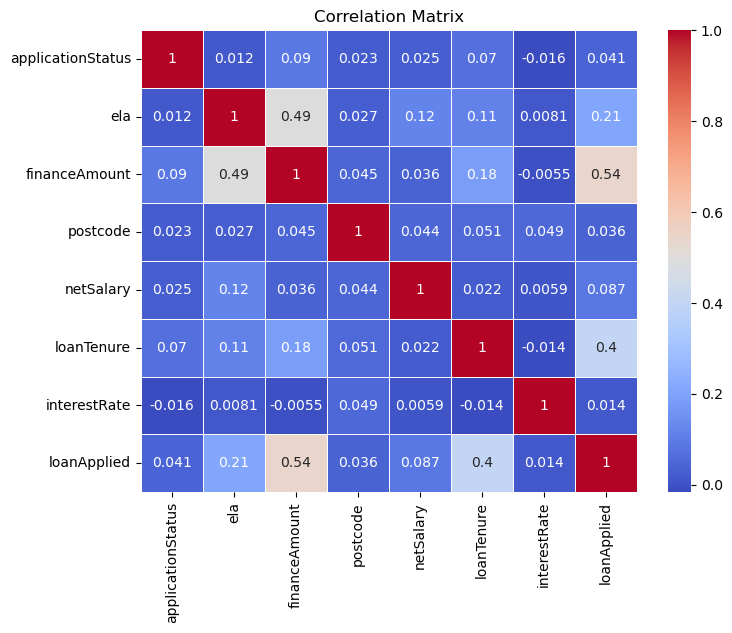

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix including the encoded_status column
correlation_matrix = data_imputed.corr()

# Output the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Use - Keras Model

In [32]:
# Split into features and target variable
X = data_imputed[['financeAmount', 'loanTenure']].values  # Features: financeAmount and loanTenure
y = data_imputed['applicationStatus'].values  # Target variable

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=15, batch_size=82, verbose=1)

Epoch 1/15
10/10 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5063
Epoch 2/15
10/10 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7837
Epoch 3/15
10/10 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7837
Epoch 4/15
10/10 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7837
Epoch 5/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7837
Epoch 6/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7837
Epoch 7/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7837
Epoch 8/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7837
Epoch 9/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7837
Epoch 10/15
10/10 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7837
Epoch 11/15
10/10 [

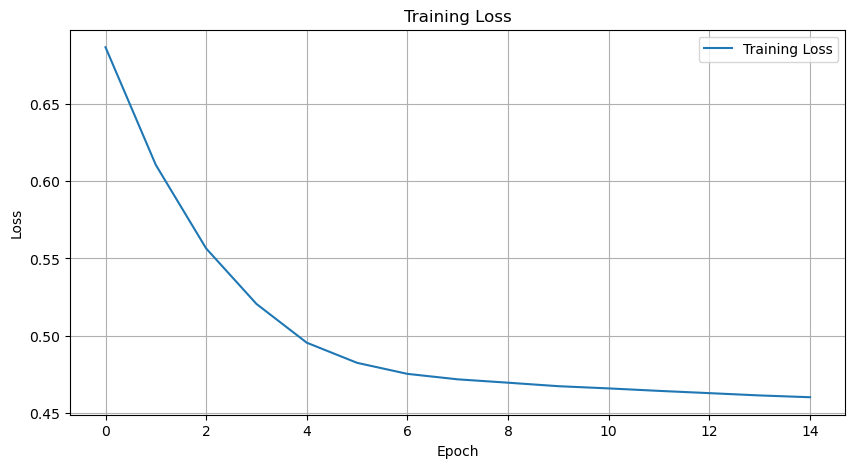

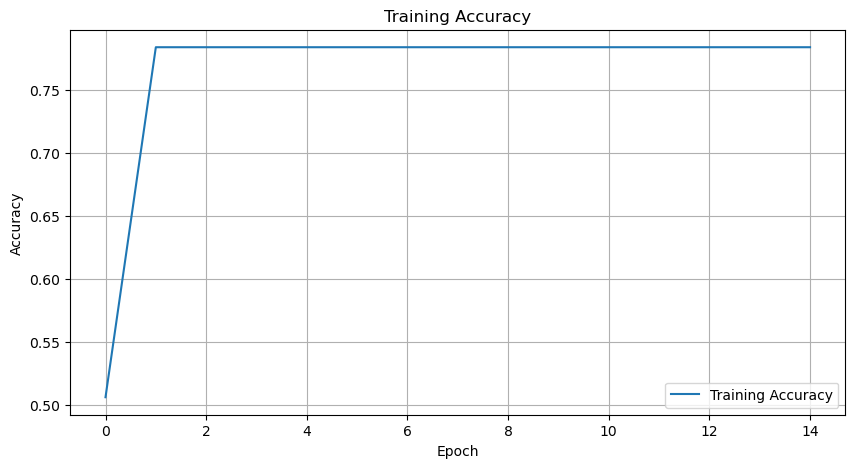

In [76]:
# Extract the training history
history = model.history

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Model Evaluation

In [77]:
# Evaluate the model on the testing set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

7/7 [==============================] - 0s 833us/step
Accuracy: 0.805
Precision: 0.805
Recall: 1.0
F1 Score: 0.89196675900277
